# Truck Backer-Upper Control Problem
Estacionar en reversa un camión hacia un muelle de carga es un ejercicio difícil. Se trata de un problema de *control no lineal* para el cual métodos tradicionales de diseño de sistemas de control pueden encontrar dificultades.

## Consideraciones
1. La posición del camión está determinada exactamente por las tres variables de estado $ϕ$, $x$ e $y$, donde $ϕ$ es el ángulo del camión con la horizontal como se muestra en la figura.
2. El control del camión es el ángulo $θ$. Solo se considera el retroceso. El camión se mueve hacia atrás una distancia fija en cada etapa.
3. Por simplicidad, asumimos suficiente espacio entre el camión y el muelle de carga de modo que $y$ no tiene que ser considerado como una entrada.

El reto aquí es diseñar un sistema de control difuso cuyas entradas sean $ϕ \in [−90°, 270°]$ y $x \in [0,20]$, y cuya salida sea $\theta \in [−40°, 40°]$, de tal manera que los estados finales sean $(x_f ,\phi_f ) = (10,90°)$.

## Diagrama de la zona de carga simulada del camión
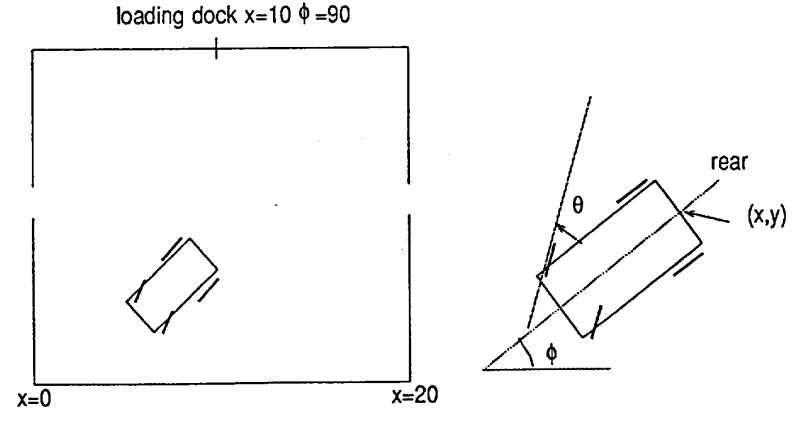

## Datos
Imagina que se le pidió a un conductor experimentado que nos ayudara a generar las mediciones de datos de entrada y salida "ideal", es decir, $(x,\phi,\theta)$ en diferentes estados $t$. De este modo, se recopilaron los siguientes datos con la trayectoria deseada comenzando desde $(x_0,\phi_0)=(1,0°)$

In [ ]:
import numpy as np

# assume the data is ordered in the following order:
# ['t', 'x', 'phi', 'Theta']
data = np.array([[  0.  ,   1.  ,   0.  , -19.  ],
       [  1.  ,   1.95,   9.37, -17.95],
       [  2.  ,   2.88,  18.23, -16.9 ],
       [  3.  ,   3.79,  26.59, -15.85],
       [  4.  ,   4.65,  34.44, -14.8 ],
       [  5.  ,   5.45,  41.78, -13.75],
       [  6.  ,   6.18,  48.6 , -12.7 ],
       [  7.  ,   7.48,  54.91, -11.65],
       [  8.  ,   7.99,  60.71, -10.6 ],
       [  9.  ,   8.72,  65.99,  -9.55],
       [ 10.  ,   9.01,  70.75,  -8.5 ],
       [ 11.  ,   9.28,  74.98,  -7.45],
       [ 12.  ,   9.46,  78.7 ,  -6.4 ],
       [ 13.  ,   9.59,  81.9 ,  -5.34],
       [ 14.  ,   9.72,  84.57,  -4.3 ],
       [ 15.  ,   9.81,  86.72,  -3.25],
       [ 16.  ,   9.88,  88.34,  -2.2 ],
       [ 17.  ,   9.91,  89.44,   0.  ]])
data

### Consigna
En este Mini reto desarrollarán en equipo un Controlador Difuso el cual, dada la información proporcionada, genere las salidas que se aproximen a lo realizado por el conductor.

Puedes utilizar la estrategia de granulación que consideres pertinente así como los tipos de funciones de pertenencia que desees.

### Evaluación
Para medir el desempeño de tu sistema utilizarás la métrica RMSE (*Root Mean Squared Error*) definida como:

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $

donde:
* $n$ es el número de puntos de datos.
* $y_i$ representa el valor real para el (i)-ésimo punto de datos.
* $\hat{y}_i$ representa el valor predicho para el (i)-ésimo punto de datos.

**Interpretación**: El RMSE mide la raíz cuadrada del promedio de los errores al cuadrado entre los valores reales y los valores predichos.
Cuanto menor sea el RMSE, mejor se ajustará el modelo a los datos observados.

In [ ]:
def get_RMSE(real_values_list, predicted_value_list):
        return(np.square(np.subtract(real_values_list, predicted_value_list)).mean())